## Queries

In [1]:
import ast
import configparser
import json
import pandas as pd
import numpy as np
from collections import Counter
from lxml import etree
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from pathlib import Path

In [2]:
config = configparser.ConfigParser()
config['PC']= {'LEIA' : 'Homework_XML/data/cfquery.xml'}
config['PC']['CONSULTAS'] =  '/RESULT/query.csv'
config['PC']['ESPERADOS'] =  '/RESULT/expected.csv'
with open('PC.CFG','w') as configfile:
    config.write(configfile)

In [ ]:
config = configparser.ConfigParser()
config.read('PC.CFG')

['PC.CFG']

In [ ]:
print(config['PC'].get('LEIA'))
print(config['PC'].get('CONSULTAS'))
print(config['PC'].get('ESPERADOS'))

Homework_XML/data/cfquery.xml
query.csv
expected.csv


In [ ]:
!ls gabriel_vieira/Homework_XML/data/

 cf74.xml   cf79.xml
 cf75.xml   cfc-2.dtd
 cf76.xml   cfcquery-2.dtd
 cf77.xml   cfquery.xml
 cf78.xml  'Modern Information Retrieval - Cystic Fibrosis Collection.htm'


In [ ]:
file_path = config['PC'].get('LEIA')
root = Path().resolve().parent
# Remove above line to use anywhere
root = 'gabriel_vieira/'
full_path = root + file_path
print(full_path)
# load xml on a ElementTree
tree = etree.parse(full_path)
# # from anywhere on the document find all tags named QUERY
queries = tree.findall('//QUERY')

gabriel_vieira/Homework_XML/data/cfquery.xml


In [ ]:
# Create a set with stopwords with capital letters
stop_words = [stop_word.upper() for stop_word in stopwords.words('english')]
# Get only words with length greater than 2
# and without any number
tokenizer = RegexpTokenizer(r'([A-Za-z]{3,})')

query_dict = {'query_number':[],'text':[]}
expected_dict = {}

for query in queries:
    query_number = int(query.find('QueryNumber').text)
    text = query.find('QueryText').text
    word_list = tokenizer.tokenize(text.upper())
    word_list = [word for word in word_list if word not in stop_words]
    query_dict['query_number'].append(query_number)
    query_dict['text'].append(word_list)

    items = query.find('Records').findall('Item')
    
    expected_dict[query_number] = {'docs_result_list':[], 'score_result_list':[]}
    # Giving less importance to author colleagues
    for item in items:
        # Score string
        score = item.values()[0]
        # Author weight
        auth = int(score[0]) * 2
        # Author colleagues weight
        auth_col = int(score[1])
        # Author Posdoc colleagues weight
        auth_pos = int(score[2]) * 2
        # Another Authors
        auth_ano = int(score[3]) * 2
        final_score = (auth + auth_col + auth_pos + auth_ano)/4
        # Document number
        doc_num = int(item.text)
            
        expected_dict[query_number]['docs_result_list'].append(doc_num)
        expected_dict[query_number]['score_result_list'].append(final_score)

    score_list = expected_dict[query_number]['score_result_list']
    # To make scalar operations on list
    score_array = np.array(score_list)
    # Reduce score into probability
    normalized_score_array = score_array/score_array.sum()
    expected_dict[query_number]['score_result_list'] = list(normalized_score_array)

In [ ]:
query_numbers = list(expected_dict.keys())
docs_info =  list(expected_dict.values())
expected_dict_for_df = {'query_numbers': [], 'doc_number_list':[],'doc_score_list':[]}
for query_number,doc_info in zip(query_numbers, docs_info):
    expected_dict_for_df['query_numbers'].append(query_number)
    expected_dict_for_df['doc_number_list'].append(doc_info['docs_result_list'])
    expected_dict_for_df['doc_score_list'].append(doc_info['score_result_list'])
    
expected_df = pd.DataFrame(expected_dict_for_df)
expected_df.head()

,query_numbers,doc_number_list,doc_score_list
0,1,"[139, 151, 166, 311, 370, 392, 439, 440, 441, ...","[0.08759124087591241, 0.072992700729927, 0.014..."
1,2,"[169, 434, 454, 498, 499, 592, 875]","[0.09523809523809523, 0.19047619047619047, 0.0..."
2,3,"[23, 40, 139, 190, 221, 246, 309, 311, 325, 34...","[0.012422360248447204, 0.012422360248447204, 0..."
3,4,"[503, 538, 539, 540, 553, 604, 669, 711, 876]","[0.038461538461538464, 0.019230769230769232, 0..."
4,5,"[23, 47, 50, 60, 114, 132, 135, 139, 151, 169,...","[0.01773049645390071, 0.02127659574468085, 0.0..."


In [ ]:
query_df = pd.DataFrame(query_dict)   
query_df.head()

,query_number,text
0,1,"[EFFECTS, CALCIUM, PHYSICAL, PROPERTIES, MUCUS..."
1,2,"[ONE, DISTINGUISH, EFFECTS, MUCUS, HYPERSECRET..."
2,3,"[SALIVARY, GLYCOPROTEINS, PATIENTS, DIFFERENT,..."
3,4,"[LIPID, COMPOSITION, RESPIRATORY, SECRETIONS]"
4,5,"[MUCUS, ABNORMAL]"


In [ ]:
query_file = config['PC'].get('CONSULTAS')
expected_file = config['PC'].get('ESPERADOS')
query_df.to_csv(query_file, sep=';', index=False)
expected_df.to_csv(expected_file, sep=';', index=False)

## GLI

In [ ]:
import ast
import configparser
import json
import pandas as pd
from collections import Counter
from lxml import etree
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from pathlib import Path

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
config = configparser.ConfigParser()
config['GLI']= {'LEIA' : ['Homework_XML/data/cf74.xml', 'Homework_XML/data/cf79.xml', 'Homework_XML/data/cf75.xml','Homework_XML/data/cf76.xml','Homework_XML/data/cf77.xml','Homework_XML/data/cf78.xml']}
config['GLI']['ESCREVA'] =  "['inverted_index.csv', 'doc_index.csv']"
with open('GLI.CFG','w') as configfile:
    config.write(configfile)

In [ ]:
!cat GLI.CFG

[GLI]
leia = ['Homework_XML/data/cf74.xml', 'Homework_XML/data/cf79.xml', 'Homework_XML/data/cf75.xml', 'Homework_XML/data/cf76.xml', 'Homework_XML/data/cf77.xml', 'Homework_XML/data/cf78.xml']
escreva = ['inverted_index.csv', 'doc_index.csv']



In [ ]:
config = configparser.ConfigParser()
config.read('GLI.CFG')

['GLI.CFG']

In [ ]:
print(config['GLI'].get('LEIA'))
print(config['GLI'].get('ESCREVA'))

['Homework_XML/data/cf74.xml', 'Homework_XML/data/cf79.xml', 'Homework_XML/data/cf75.xml', 'Homework_XML/data/cf76.xml', 'Homework_XML/data/cf77.xml', 'Homework_XML/data/cf78.xml']
['inverted_index.csv', 'doc_index.csv']


In [ ]:
files_list_str = config['GLI'].get('LEIA')
# Load list from string
files_list = ast.literal_eval(files_list_str)

In [ ]:
files_list

['Homework_XML/data/cf74.xml',
 'Homework_XML/data/cf79.xml',
 'Homework_XML/data/cf75.xml',
 'Homework_XML/data/cf76.xml',
 'Homework_XML/data/cf77.xml',
 'Homework_XML/data/cf78.xml']

In [ ]:
root = Path().resolve().parent
# Remove above line to use anywhere
root = 'gabriel_vieira/'

docs_dict = {}
# Create a set with stopwords with capital letters
stop_words = set([stop_word.upper() for stop_word in stopwords.words('english')] )
words = set()
# Get only words with length greater than 2
# and without any number
tokenizer = RegexpTokenizer(r'([A-Za-z]{3,})')
for file_path in files_list:
    full_path = root + file_path
    print(full_path)
    # load xml on a ElementTree
    tree = etree.parse(full_path)
    # from anywhere on the document find all tags named RECORD
    records = tree.findall('//RECORD')
    for record in records:
        # For each record find recordnum
        # and check if there is abstract
        # if not check extract
        record_num = record.find('RECORDNUM')
        record_num = int(record_num.text)
        abstract = record.find('ABSTRACT')
        if abstract is None:
            extract = record.find('EXTRACT')
            if extract is None:
                continue
            text = extract.text
            word_list = tokenizer.tokenize(text.upper())
            word_frequency = Counter(word_list)
            # Check Stopwords present on counter and remove them
            stop_words_present = set(word_frequency.keys()).intersection(stop_words)
            for stop_word in stop_words_present:
                del word_frequency[stop_word]
            docs_dict[record_num] = dict(word_frequency)
            
            # Create a list only with unique words
            words.update(word_list)
            continue
        text = abstract.text
        word_list = tokenizer.tokenize(text.upper())
        word_frequency = Counter(word_list)
        # Check Stopwords present on counter and remove them
        stop_words_present = set(word_frequency.keys()).intersection(stop_words)
        for stop_word in stop_words_present:
            del word_frequency[stop_word]
        docs_dict[record_num] = dict(word_frequency)
 
        # Create a list only with unique words
        words.update(word_list)
        
# Remove all stopwords from the list of unique words
words = words - stop_words
# Make words be a list
words = list(words)

gabriel_vieira/Homework_XML/data/cf74.xml
gabriel_vieira/Homework_XML/data/cf79.xml
gabriel_vieira/Homework_XML/data/cf75.xml
gabriel_vieira/Homework_XML/data/cf76.xml
gabriel_vieira/Homework_XML/data/cf77.xml
gabriel_vieira/Homework_XML/data/cf78.xml


In [ ]:
print(f"Number of docs: {len(docs_dict)}")
print(f"Number of words: {len(words)}")

Number of docs: 1215
Number of words: 9136


In [ ]:
words[:10]

['SUPPLY',
 'ADAPTED',
 'ACYL',
 'REQUESTED',
 'PROPORTIONAL',
 'MATURING',
 'BABY',
 'ERADICATING',
 'ADAPTING',
 'PRODUCTS']

In [ ]:
# Create inverted index 
inverted_index_dict = {}
for word in words:
    doc_freq = {}
    for doc_num in docs_dict:
        freq = docs_dict[doc_num].get(word, 0)
        if freq > 0:
            doc_freq[doc_num] = freq
    inverted_index_dict[word] = doc_freq

In [ ]:
inverted_index = pd.DataFrame(inverted_index_dict.items(),columns=['Word', 'Adjacency Doc Frequency List'])

In [ ]:
inverted_index.head()

,Word,Adjacency Doc Frequency List
0,SUPPLY,"{115: 1, 220: 1, 539: 1, 792: 1}"
1,ADAPTED,{745: 1}
2,ACYL,{621: 1}
3,REQUESTED,{731: 1}
4,PROPORTIONAL,"{1159: 1, 348: 1, 950: 1, 951: 1}"


In [ ]:
output_files = ast.literal_eval(config['GLI'].get('ESCREVA'))
inverted_csv_file_name = output_files[0]
docs_csv_file_name = output_files[1]

In [ ]:
# Save inverted_index as csv
inverted_index.to_csv(inverted_csv_file_name, sep=';', index=False)

In [ ]:
doc_index = pd.DataFrame(docs_dict.items(),columns=['Doc', 'Adjacency Word Frequency List'])
doc_index.head()

,Doc,Adjacency Word Frequency List
0,1,"{'SIGNIFICANCE': 1, 'PSEUDOMONAS': 3, 'AERUGIN..."
1,2,"{'SALIVARY': 3, 'AMYLASE': 5, 'LEVELS': 4, 'DE..."
2,3,"{'ARTICLE': 1, 'REPORTS': 1, 'POSSIBILITY': 1,..."
3,4,"{'INSTRUMENTAL': 1, 'NEUTRON': 1, 'ACTIVATION'..."
4,5,"{'CAPACITY': 1, 'DUODENAL': 3, 'JUICE': 3, 'HY..."


In [ ]:
# Save doc_index as csv
doc_index.to_csv(docs_csv_file_name, sep=';', index=False)

## Indexer

In [ ]:
import ast
import configparser
import json
import pandas as pd
import numpy as np
from pathlib import Path

In [ ]:
config = configparser.ConfigParser()
config['INDEX']= {'LEIA' : ['inverted_index.csv', 'doc_index.csv']}
config['INDEX']['ESCREVA'] =  "vectorial_model.json"
with open('INDEX.CFG','w') as configfile:
    config.write(configfile)

In [ ]:
config = configparser.ConfigParser()
config.read('INDEX.CFG')

['INDEX.CFG']

In [ ]:
print(config['INDEX'].get('LEIA'))
print(config['INDEX'].get('ESCREVA'))

['inverted_index.csv', 'doc_index.csv']
vectorial_model.json


In [ ]:
files_list_str = config['INDEX'].get('LEIA')
# Load list from string
files_list = ast.literal_eval(files_list_str)

In [ ]:
files_list

['inverted_index.csv', 'doc_index.csv']

In [ ]:
inverted_index = pd.read_csv(files_list[0], sep=';')
doc_index = pd.read_csv(files_list[1], sep=';')

In [ ]:
# Sorted words from a to z
inverted_index.sort_values(by='Word', inplace=True)
inverted_index.reset_index(drop=True, inplace=True)
inverted_index.head()

,Word,Adjacency Doc Frequency List
0,ABANDON,{90: 1}
1,ABANDONED,{550: 1}
2,ABDOMEN,{1063: 1}
3,ABDOMENS,{37: 1}
4,ABDOMINAL,"{37: 2, 95: 2, 149: 2, 1063: 1, 182: 1, 202: 3..."


In [ ]:
tf_idf_df =  inverted_index.copy()
# Use word as a index
tf_idf_df = tf_idf_df.set_index('Word')
tf_idf_df.head()

,Adjacency Doc Frequency List
Word,
ABANDON,{90: 1}
ABANDONED,{550: 1}
ABDOMEN,{1063: 1}
ABDOMENS,{37: 1}
ABDOMINAL,"{37: 2, 95: 2, 149: 2, 1063: 1, 182: 1, 202: 3..."


In [ ]:
total_number_docs = doc_index['Doc'].count()
word_idf_dict = {}
word_tf_idf_dict = {}
for word, row in tf_idf_df.iterrows():
    # Get frequency on docs that it appear
    word_frequencies_on_docs = ast.literal_eval(row['Adjacency Doc Frequency List'])
    # Get number of docs word apperas
    number_docs_word_appears = len(word_frequencies_on_docs)
    # Calculate inverse document frequency
    idf = np.log2(total_number_docs/number_docs_word_appears)
    word_idf_dict[word] = idf   
    tf_idf_dict = {}
    for doc_number, frequency in word_frequencies_on_docs.items():
        # using third recommended tf-idf weighting scheme
        # implies using log normalization on term frequency
        normalized_term_frequency = np.log2(1 + frequency)
        tf_idf_dict[doc_number] = normalized_term_frequency * idf

    # Put tf_idf for each word
    word_tf_idf_dict[word] = tf_idf_dict

# Create series object to insert on dataframe
idf_series = pd.Series(word_idf_dict, index=list(word_idf_dict.keys()))
tf_idf_series = pd.Series(word_tf_idf_dict, index=list(word_tf_idf_dict.keys()))

In [ ]:
tf_idf_df['Inverse Document Frequency'] = idf_series
tf_idf_df['Tf-Idf'] = tf_idf_series
tf_idf_df.drop(columns=['Adjacency Doc Frequency List'], inplace=True)
tf_idf_df.head()

,Inverse Document Frequency,Tf-Idf
Word,,
ABANDON,10.246741,{90: 10.246740598493144}
ABANDONED,10.246741,{550: 10.246740598493144}
ABDOMEN,10.246741,{1063: 10.246740598493144}
ABDOMENS,10.246741,{37: 10.246740598493144}
ABDOMINAL,6.159278,"{37: 9.762224276755749, 95: 9.762224276755749,..."


In [ ]:
doc_tf_idf = doc_index.copy()
doc_tf_idf.set_index('Doc', inplace=True)

In [ ]:
tf_idf_dict = {}
for doc_number, row in doc_tf_idf.iterrows():
    word_frequencies = ast.literal_eval(row['Adjacency Word Frequency List'])
    tf_idf_word_dict = {}
    for word in word_frequencies:
        tf_idf_value = tf_idf_df['Tf-Idf'][word][doc_number]
        tf_idf_word_dict[word] = tf_idf_value
    tf_idf_dict[doc_number] = tf_idf_word_dict


In [ ]:
tf_idf_series = pd.Series(tf_idf_dict, index=list(tf_idf_dict.keys()))
doc_tf_idf['Doc Tf-Idf'] = tf_idf_series

In [ ]:
doc_tf_idf.drop(columns=['Adjacency Word Frequency List'], inplace=True)
doc_tf_idf.head()

,Doc Tf-Idf
Doc,
1,"{'SIGNIFICANCE': 5.546300880352051, 'PSEUDOMON..."
2,"{'SALIVARY': 10.318555514485608, 'AMYLASE': 14..."
3,"{'ARTICLE': 5.388759603365571, 'REPORTS': 4.99..."
4,"{'INSTRUMENTAL': 9.246740598493144, 'NEUTRON':..."
5,"{'CAPACITY': 4.820475843791045, 'DUODENAL': 12..."


In [ ]:
doc_json_str = doc_tf_idf.to_json(orient="columns")

In [ ]:
vectorial_model_str = tf_idf_df.to_json(orient="columns")

In [ ]:
vectorial_model = json.loads(vectorial_model_str)
doc_json = json.loads(doc_json_str)

In [ ]:
print(doc_json.keys())
print(vectorial_model.keys())

dict_keys(['Doc Tf-Idf'])
dict_keys(['Inverse Document Frequency', 'Tf-Idf'])


In [ ]:
vectorial_model['Doc Tf-Idf'] = doc_json['Doc Tf-Idf']

In [ ]:
vectorial_model_file_path = config['INDEX'].get('ESCREVA')
with open(vectorial_model_file_path, "w") as vectorial_model_file: 
    json.dump(vectorial_model, vectorial_model_file) 

## Search engine

In [ ]:
import ast
import configparser
import json
import pandas as pd
import numpy as np
from collections import Counter
from lxml import etree
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from pathlib import Path

In [ ]:
config = configparser.ConfigParser()
config['BUSCA']= {'MODELO' : 'vectorial_model.json'}
config['BUSCA']['CONSULTAS'] =  "query.csv"
config['BUSCA']['RESULTADOS'] =  "results.csv"
with open('BUSCA.CFG','w') as configfile:
    config.write(configfile)

In [ ]:
config = configparser.ConfigParser()
config.read('BUSCA.CFG')

['BUSCA.CFG']

In [ ]:
print(config['BUSCA'].get('MODELO'))
print(config['BUSCA'].get('CONSULTAS'))
print(config['BUSCA'].get('RESULTADOS'))

vectorial_model.json
query.csv
results.csv


In [ ]:
model_file = config['BUSCA'].get('MODELO')
query_file = config['BUSCA'].get('CONSULTAS')

In [ ]:
model = open(model_file)
vectorial_model = json.load(model)
query_df = pd.read_csv(query_file, sep=';')

In [ ]:
vectorial_model.keys()

dict_keys(['Inverse Document Frequency', 'Tf-Idf', 'Doc Tf-Idf'])

In [ ]:
query_df.head()

,query_number,text
0,1,"['EFFECTS', 'CALCIUM', 'PHYSICAL', 'PROPERTIES..."
1,2,"['ONE', 'DISTINGUISH', 'EFFECTS', 'MUCUS', 'HY..."
2,3,"['SALIVARY', 'GLYCOPROTEINS', 'PATIENTS', 'DIF..."
3,4,"['LIPID', 'COMPOSITION', 'RESPIRATORY', 'SECRE..."
4,5,"['MUCUS', 'ABNORMAL']"


In [ ]:
# Store results for each query
results = {}
for idx, row in query_df.iterrows():
    query_number = row['query_number']
    query_words = ast.literal_eval(row['text'])
    query_length=0
    doc_norm = {}
    rank_numerator = {}
    for word in query_words:
        # Get w_t_q 
        word_query_weight = vectorial_model['Inverse Document Frequency'].get(word)
        if word_query_weight is None:
            continue
        # Query length = sum of all w_t_q
        query_length += word_query_weight
        tf_idf_word = vectorial_model['Tf-Idf'][word]
        for doc in tf_idf_word:
            # Get w_t_d 
            word_document_weight = tf_idf_word[doc]
            if doc in rank_numerator:
                rank_numerator[doc] += word_document_weight * word_query_weight
            else:
                # Create Doc length
                rank_numerator[doc] = word_document_weight * word_query_weight

            if doc not in doc_norm:
                # Get doc norms
                doc_vector_length = sum(list(vectorial_model['Doc Tf-Idf'][doc].values()))
                doc_norm[doc] = np.sqrt(pow(doc_vector_length, 2))
    # Get query norm
    query_norm = np.sqrt(pow(query_length, 2))

    rank = {}
    for doc, numerator in rank_numerator.items():
        # Rank each document that had at least
        # one word that query provided
        distance = numerator / (doc_norm[doc] * query_norm)
        rank[int(doc)] = distance

    # Change rank to be [rank_position, doc_number, distance]
    rank_df = pd.Series(rank) \
        .sort_values() \
        .reset_index() \
        .reset_index() \
        .rename(columns={'level_0':'rank','index':'doc_number', 0:'distance'}) \
        .iloc[:20]
    rank_df['rank']+=1
    rank_matrix = rank_df.to_numpy()
    # Store rank matrix
    results[query_number] = rank_matrix

In [ ]:
results_df = pd.DataFrame(results.items(), columns=['Query_number','results'])

In [ ]:
results_file = config['BUSCA'].get('RESULTADOS')
results_df.to_csv(results_file, sep=';', index=False)

## Result Evaluation 

In [1]:
import ast
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from tqdm import tqdm

In [2]:
root = Path().resolve().parent

In [117]:
results_file = str(root)+ '/RESULT/results_stemmer.json'
expected_file = str(root)+ '/RESULT/expected.csv'
eval_files_path = str(root) + '/EVALUATION/'

In [89]:
results = open(results_file)
results_json_str = json.load(results)
results_json = json.loads(results_json_str)
results_df = pd.DataFrame(results_json)
expected_df = pd.read_csv(expected_file, sep=';')

In [90]:
results_df.set_index('query_number', inplace=True)

In [46]:
def rank_and_expected_rank(row, results_df, query_number):
    """
    Return rank_df and expected_rank_df
    """
    doc_number_list = ast.literal_eval(row['doc_number_list'])
    score_list = ast.literal_eval(row['doc_score_list'])
    size = len(doc_number_list)
    rank = list(range(1, size+1))
    expected_rank = {'doc_number':doc_number_list ,'score':score_list}
    expected_rank_df = pd.DataFrame(expected_rank)
    expected_rank_df = expected_rank_df.sort_values(by='score', ascending=False).reset_index(drop=True)
    expected_rank_df['rank']= rank

    results = results_df['results'][query_number]
    rank_df = pd.DataFrame(results, columns=['rank','doc_number','distance'])
    rank_df['doc_number'] = rank_df['doc_number'].astype(int)

    return rank_df , expected_rank_df

In [69]:
def recall_precision(rank_doc_set,expected_rank_doc_set):
    """
    calculate recall and precision given rank
    and expected rank
    """
    relevant_documents_retrieved = rank_doc_set.intersection(expected_rank_doc_set)
    relevant_doc_ret_size = len(relevant_documents_retrieved)
    retrieved_doc_size = len(rank_doc_set)
    relevant_doc_size = len(expected_rank_doc_set)

    # Precision 
    precision = relevant_doc_ret_size/retrieved_doc_size

    # Recall
    recall = relevant_doc_ret_size/relevant_doc_size

    return precision, recall

In [119]:
def rel_pres_recall(rank_df, expected_rank_doc_set):
    """
    Return recall and precision for each relevant found
    on its rank position
    """
    relevant_precis_recall = {'index':[],'precision':[],'recall':[]}
    for _, rank_row in rank_df.iterrows():
        if rank_row['doc_number'] in list(expected_rank_doc_set):
            mask = rank_df['doc_number']==rank_row['doc_number']
            slice_index = rank_df[mask].index[0]
            slice_index +=1
            rank_doc_set_sliced = set(rank_df.iloc[:slice_index]['doc_number'])

            precision, recall = recall_precision(rank_doc_set_sliced, expected_rank_doc_set)
            
            relevant_precis_recall['index'].append(slice_index)
            relevant_precis_recall['precision'].append(precision)
            relevant_precis_recall['recall'].append(recall)
    return relevant_precis_recall

In [49]:
def recall_precision_11_points(relevant_precis_recall):
    """
    Create 11 points precision recall curve using
    recall and precision matri for each relevant 
    position
    """
    recall_axis = np.linspace(0.0,1.0,num=11)
    rec_prec_11_points = np.zeros((11,2))
    precision_max = 0
    for index, recall_point in enumerate(recall_axis):
        flag_inserted = 0
        for position, recall in enumerate(relevant_precis_recall['recall']):
            precision = relevant_precis_recall['precision'][position] 
            if recall >= recall_point:
                # Retrieve only max precision point from any recall >= recall%
                precision_max = max(relevant_precis_recall['precision'][position:])
                # index 0 = recall values
                rec_prec_11_points[index][0] = recall_point
                # index 1 = precision values
                rec_prec_11_points[index][1] = precision_max
                flag_inserted = 1
                break
        
        # if didnt insert anything copy last precision point
        if not flag_inserted:
            rec_prec_11_points[index][0] = recall_point
            rec_prec_11_points[index][1] = rec_prec_11_points[index-1][1]

    return rec_prec_11_points

In [50]:
def calculate_r_precision(rank_df, expected_rank_doc_set):
    """
    Calculate precision on rank using relevant size
    """
    relevant_size = len(expected_rank_doc_set)
    rank_doc_set_sliced = set(rank_df.iloc[:relevant_size]['doc_number'])
    r_precision, _ = recall_precision(rank_doc_set_sliced, expected_rank_doc_set)
    return r_precision



def calculate_reciprocal_rank(rank_df, expected_rank_df):
    """
    Calculate reciprocal rank = 1/first_rank_relevant
    """
    counter = 0
    for relevant_doc in expected_rank_df['doc_number']:
        if relevant_doc in list(rank_df['doc_number']):
            mask = rank_df['doc_number']==relevant_doc
            rank = int(rank_df.loc[mask]['rank'])
            if counter == 0:
                counter = 1
                rank_min = rank
            if rank < rank_min:
                rank_min = rank
    reciprocal_rank = 1/rank_min
    return reciprocal_rank


def calculate_dcg(rank_df, expected_rank_df):
    """
    Calculate dcg using score from expected_rank_df
    """
    for index, rank_row in rank_df.iterrows():
        # Rank only to 10
        if index>10:
            break
        rank = rank_row['rank']
        doc_number = rank_row['doc_number']
        score = 0
        if doc_number in list(expected_rank_df['doc_number']):
            mask = expected_rank_df['doc_number']==doc_number
            score = float(expected_rank_df[mask]['score'])
        if rank>1:
            discounted_cumulative_gain += score/np.log2(rank)
            continue
        discounted_cumulative_gain = score
    return discounted_cumulative_gain



def calculate_idcg(expected_rank_df):
    """
    Calculate idealized discounted 
    gain using expected_rank_df
    score
    """
    for index, expected_row in expected_rank_df.iterrows():
        # Rank only to 10
        if index>10:
            break
        rank = expected_row['rank']
        if rank>1:
            idealized_discounted_cumulative_gain += expected_row['score']/np.log2(rank)
            continue
        idealized_discounted_cumulative_gain = expected_row['score']
    return idealized_discounted_cumulative_gain


In [123]:
query_eval = {}
mean_average_precision_total = []
r_precision_total = []
reciprocal_rank_total = []
rec_prec_11_points_total = []
dcg_total = []
idcg_total = []
stemmer_present = 'stemmer'
for idx, row in tqdm(expected_df.iterrows()):
    evaluations = {}
    query_number = row['query_number']

    rank_df, expected_rank_df = rank_and_expected_rank(row, results_df, query_number)
    
    expected_rank_doc_set = set(expected_rank_df['doc_number'])
    rank_doc_set = set(rank_df['doc_number'])

    precision, recall = recall_precision(rank_doc_set, expected_rank_doc_set)

    # F1
    epsilon = 1e-10
    f1 = 2/((1/(recall+epsilon) )+(1/(precision+epsilon) ))
    evaluations['f1'] = f1

    top_5_doc_rank = set(rank_df['doc_number'][:5])
    precision_at_5 = len(top_5_doc_rank.intersection(expected_rank_doc_set))/5

    top_10_doc_rank = set(rank_df['doc_number'][:10])
    precision_at_10 = len(top_10_doc_rank.intersection(expected_rank_doc_set))/10

    evaluations['P@5'] = precision_at_5
    evaluations['P@10'] = precision_at_10

    relevant_precis_recall = rel_pres_recall(rank_df, expected_rank_doc_set)

    rec_prec_11_points = recall_precision_11_points(relevant_precis_recall)
    rec_prec_11_points_total.append(rec_prec_11_points)

    r_precision = calculate_r_precision(rank_df, expected_rank_doc_set)
    r_precision_total.append(r_precision)

    relevant_size = len(expected_rank_doc_set)
    mean_average_precision_query = sum(relevant_precis_recall['precision'])/relevant_size
    mean_average_precision_total.append(mean_average_precision_query)

    reciprocal_rank = calculate_reciprocal_rank(rank_df, expected_rank_df)
    reciprocal_rank_total.append(reciprocal_rank)

    discounted_cumulative_gain = calculate_dcg(rank_df, expected_rank_df)
    dcg_total.append(discounted_cumulative_gain)

    idealized_discounted_cumulative_gain = calculate_idcg(expected_rank_df)
    idcg_total.append(idealized_discounted_cumulative_gain)

    query_eval[query_number] = evaluations

99it [00:16,  6.04it/s]


In [93]:
mean_reciprocal_rank = sum(reciprocal_rank_total)/len(reciprocal_rank_total)

In [94]:
mean_average_precision = sum(mean_average_precision_total)/len(mean_average_precision_total)

In [95]:
avg_dcg_10  = sum(dcg_total)/len(dcg_total)
avg_idcg_10 = sum(idcg_total)/len(idcg_total)
normalized_dcg_10 = avg_dcg_10/avg_idcg_10

In [115]:
query_eval_df = pd.DataFrame(query_eval.values(),index=query_eval.keys())
query_eval_df['MAP'] = mean_average_precision_total
query_eval_df['R_precision'] = r_precision_total
query_eval_df

,f1,P@5,P@10,MAP,R_precision
1,0.136095,0.6,0.3,0.216848,0.294118
2,0.019293,0.4,0.2,0.301020,0.285714
3,0.138329,0.2,0.4,0.165244,0.302326
4,0.061069,0.0,0.2,0.114236,0.111111
5,0.297521,0.8,0.8,0.217876,0.335878
...,...,...,...,...,...
96,0.050633,0.6,0.4,0.287361,0.333333
97,0.057143,0.6,0.4,0.400246,0.363636
98,0.037618,0.6,0.3,0.206298,0.200000
99,0.019417,0.6,0.3,0.600000,0.600000


In [122]:
query_eval_df['P@5'].mean()

0.5555555555555556

In [126]:
avg_rec_prec_11_points = np.zeros_like(rec_prec_11_points_total[0])
for rec_prec_11_points in rec_prec_11_points_total:
    avg_rec_prec_11_points+=rec_prec_11_points
avg_rec_prec_11_points = avg_rec_prec_11_points/len(rec_prec_11_points_total)

In [127]:
avg_rec_prec_11_points

array([[0.        , 0.85671336],
       [0.1       , 0.64836418],
       [0.2       , 0.52756778],
       [0.3       , 0.36484928],
       [0.4       , 0.29268888],
       [0.5       , 0.23641008],
       [0.6       , 0.19772952],
       [0.7       , 0.17265412],
       [0.8       , 0.16212727],
       [0.9       , 0.16048302],
       [1.        , 0.16048302]])

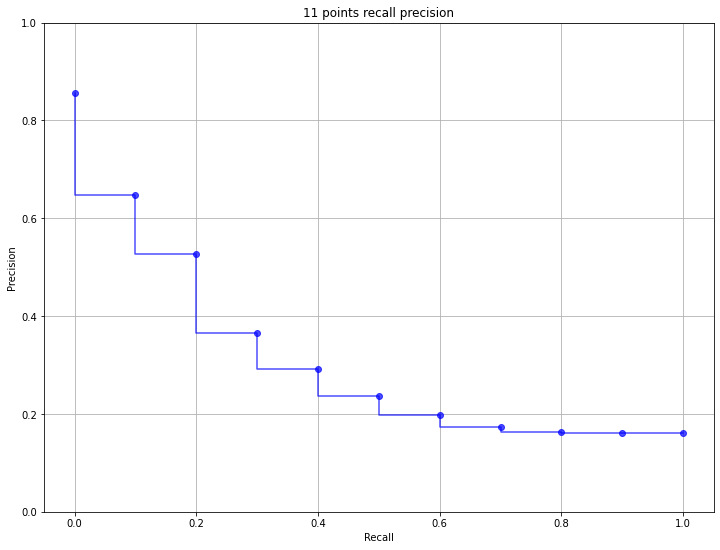

In [141]:


plt.figure(figsize=(12,9))
plt.title('11 points recall precision')
plt.ylim(bottom=0.0, top=1.0)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.step(avg_rec_prec_11_points[:,0], avg_rec_prec_11_points[:,1], 'o-', c='b', alpha=0.7)
plt.grid()
# plt.savefig(f'{eval_files_path}11points_{stemmer_present}_{query_number}.pdf')
plt.show()

In [116]:
df_11_points = pd.DataFrame(rec_prec_11_points).rename(columns={0:'Recall',1:'Precision'})
df_11_points.to_csv(f"{eval_files_path}11points_{stemmer_present}_{query_number}.csv",index=False)

,Recall,Precision
0,0.0,1.000000
1,0.1,1.000000
2,0.2,1.000000
3,0.3,0.200000
4,0.4,0.020325
5,0.5,0.020325
6,0.6,0.020325
7,0.7,0.020325
8,0.8,0.020325
9,0.9,0.020325


In [96]:
normalized_dcg_10

0.4638856277702484

In [97]:
mean_average_precision

0.25056880019104233

In [98]:
mean_reciprocal_rank

0.8204774929522404

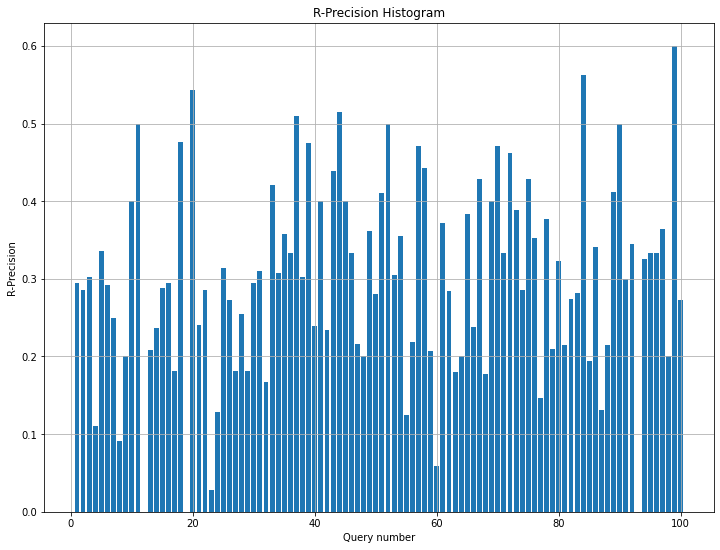

In [99]:
x = list(expected_df['query_number'])
y = r_precision_total
plt.figure(figsize=(12,9))
plt.title('R-Precision Histogram')
plt.ylabel('R-Precision')
plt.xlabel('Query number')
plt.bar(x,y)
plt.grid()
plt.show()

In [60]:
rank_df

,rank,doc_number,distance
0,1,183,0.597088
1,2,579,0.479441
2,3,1017,0.233545
3,4,871,0.107459
4,5,594,0.079242
...,...,...,...
299,300,1060,0.002096
300,301,1110,0.002089
301,302,998,0.002088
302,303,310,0.002086


In [61]:
expected_rank_df

,doc_number,score,rank
0,183,0.186667,1
1,579,0.186667,2
2,1017,0.160000,3
3,1000,0.133333,4
4,370,0.106667,5
5,59,0.040000,6
6,803,0.040000,7
7,833,0.040000,8
8,1097,0.040000,9
9,1232,0.040000,10


In [62]:
expected_rank_doc_set

{59, 183, 370, 579, 803, 833, 1000, 1017, 1033, 1097, 1232}

In [68]:
rel_pres_recall(rank_df, expected_rank_doc_set)

{'index': [1, 2, 3, 20, 246],
 'precision': [1.0, 1.0, 1.0, 0.2, 0.02032520325203252],
 'recall': [0.09090909090909091,
  0.18181818181818182,
  0.2727272727272727,
  0.36363636363636365,
  0.45454545454545453]}

In [65]:
len(rank_doc_set)

304